In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import losses
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss', marker=".")
    #plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

In [3]:
with open("data/kernel_generated2/Pressure_s_Carbon-loc-isoth-N2.xlsx.npy", 'rb') as f:
    pressures_carbon = np.load(f)
with open("data/kernel_generated2/Pressure_s_Silica-loc-isoth1.xlsx.npy", 'rb') as f:
    pressures_silica = np.load(f)

In [4]:
len(pressures_silica), len(pressures_carbon)

(458, 580)

In [5]:
x = []
y = []
for i in range(1, 10001):
    raw_data = np.load(f'data/test_silica/{i}.npz')
    x.append(np.concatenate((raw_data["n_s"]/max(raw_data["n_s"]), raw_data["n_d"]/max(raw_data["n_d"])), axis=0))
    y.append([1, 0])
for i in range(1, 10001):
    raw_data = np.load(f'data/test_carbon/{i}.npz')
    n_s = np.interp(pressures_silica, pressures_carbon, raw_data["n_s"])
    n_d = np.interp(pressures_silica, pressures_carbon, raw_data["n_d"])
    x.append(np.concatenate((n_s/max(n_s), n_d/max(n_d)), axis=0))
    y.append([0, 1])
x, y = shuffle(x, y)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [7]:
model = keras.Sequential(
    [
        keras.Input(shape=len(x_train[0], )),
        layers.Dense(800, activation='relu'),
        layers.Dense(400, activation='relu'),
        layers.Dense(200, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(50, activation='relu'),
        layers.Dense(2)
    ]
)

In [8]:
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [9]:
history = model.fit(np.array(x_train), np.array(y_train), epochs=100, batch_size=100, shuffle=True)
plot_loss(history)

Epoch 1/100
134/134 [==============================] - 3s 16ms/step - loss: 8.0182 - accuracy: 0.5025
Epoch 2/100
134/134 [==============================] - 2s 16ms/step - loss: 8.0181 - accuracy: 0.5025
Epoch 3/100
134/134 [==============================] - 3s 25ms/step - loss: 8.0182 - accuracy: 0.5025
Epoch 4/100
134/134 [==============================] - 3s 21ms/step - loss: 8.0182 - accuracy: 0.5025
Epoch 5/100
134/134 [==============================] - 4s 28ms/step - loss: 8.0182 - accuracy: 0.5025
Epoch 6/100
134/134 [==============================] - 4s 31ms/step - loss: 8.0182 - accuracy: 0.5025
Epoch 7/100
134/134 [==============================] - 4s 28ms/step - loss: 8.0182 - accuracy: 0.5025
Epoch 8/100
134/134 [==============================] - 4s 31ms/step - loss: 8.0181 - accuracy: 0.5025
Epoch 9/100
134/134 [==============================] - 4s 31ms/step - loss: 8.0182 - accuracy: 0.5025
Epoch 10/100
134/134 [==============================] - 3s 26ms/step - loss: 8.018

KeyboardInterrupt: 

[0, 1]


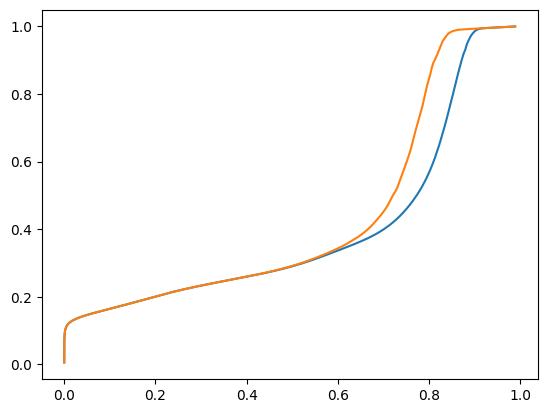

In [14]:
i = 1402



plt.plot(pressures_silica, x[i][:458])
plt.plot(pressures_silica, x[i][458:])
print(y[i])